In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import functools as ft
import matplotlib.font_manager as font_manager

In [2]:
sales = pd.read_csv('data/eda_sales.csv')
details = pd.read_csv('data/eda_details.csv')

Let's have a general picture of the tables

In [3]:
sales.shape

(21597, 4)

In [4]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21420 entries, 0 to 21419
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   bedrooms       21420 non-null  float64
 2   bathrooms      21420 non-null  float64
 3   sqft_living    21420 non-null  float64
 4   sqft_lot       21420 non-null  float64
 5   floors         21420 non-null  float64
 6   waterfront     19060 non-null  float64
 7   view           21357 non-null  float64
 8   condition      21420 non-null  int64  
 9   grade          21420 non-null  int64  
 10  sqft_above     21420 non-null  float64
 11  sqft_basement  20969 non-null  float64
 12  yr_built       21420 non-null  int64  
 13  yr_renovated   17609 non-null  float64
 14  zipcode        21420 non-null  int64  
 15  lat            21420 non-null  float64
 16  long           21420 non-null  float64
 17  sqft_living15  21420 non-null  float64
 18  sqft_l

Because there is a confusion between common column, we set equal names to the identical column in both tables.

In [5]:
# renaming details_id column to details_house_id
details = details.rename({'id':'house_id'}, axis = 1)
details.columns

Index(['house_id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

## We merge both tables in order to include all the data

In [7]:
table = sales.merge(details, how = 'left', on = 'house_id')
table.shape

(21597, 22)

In [8]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

Let's have a visual exploration on the missing values of each feature

<Axes: >

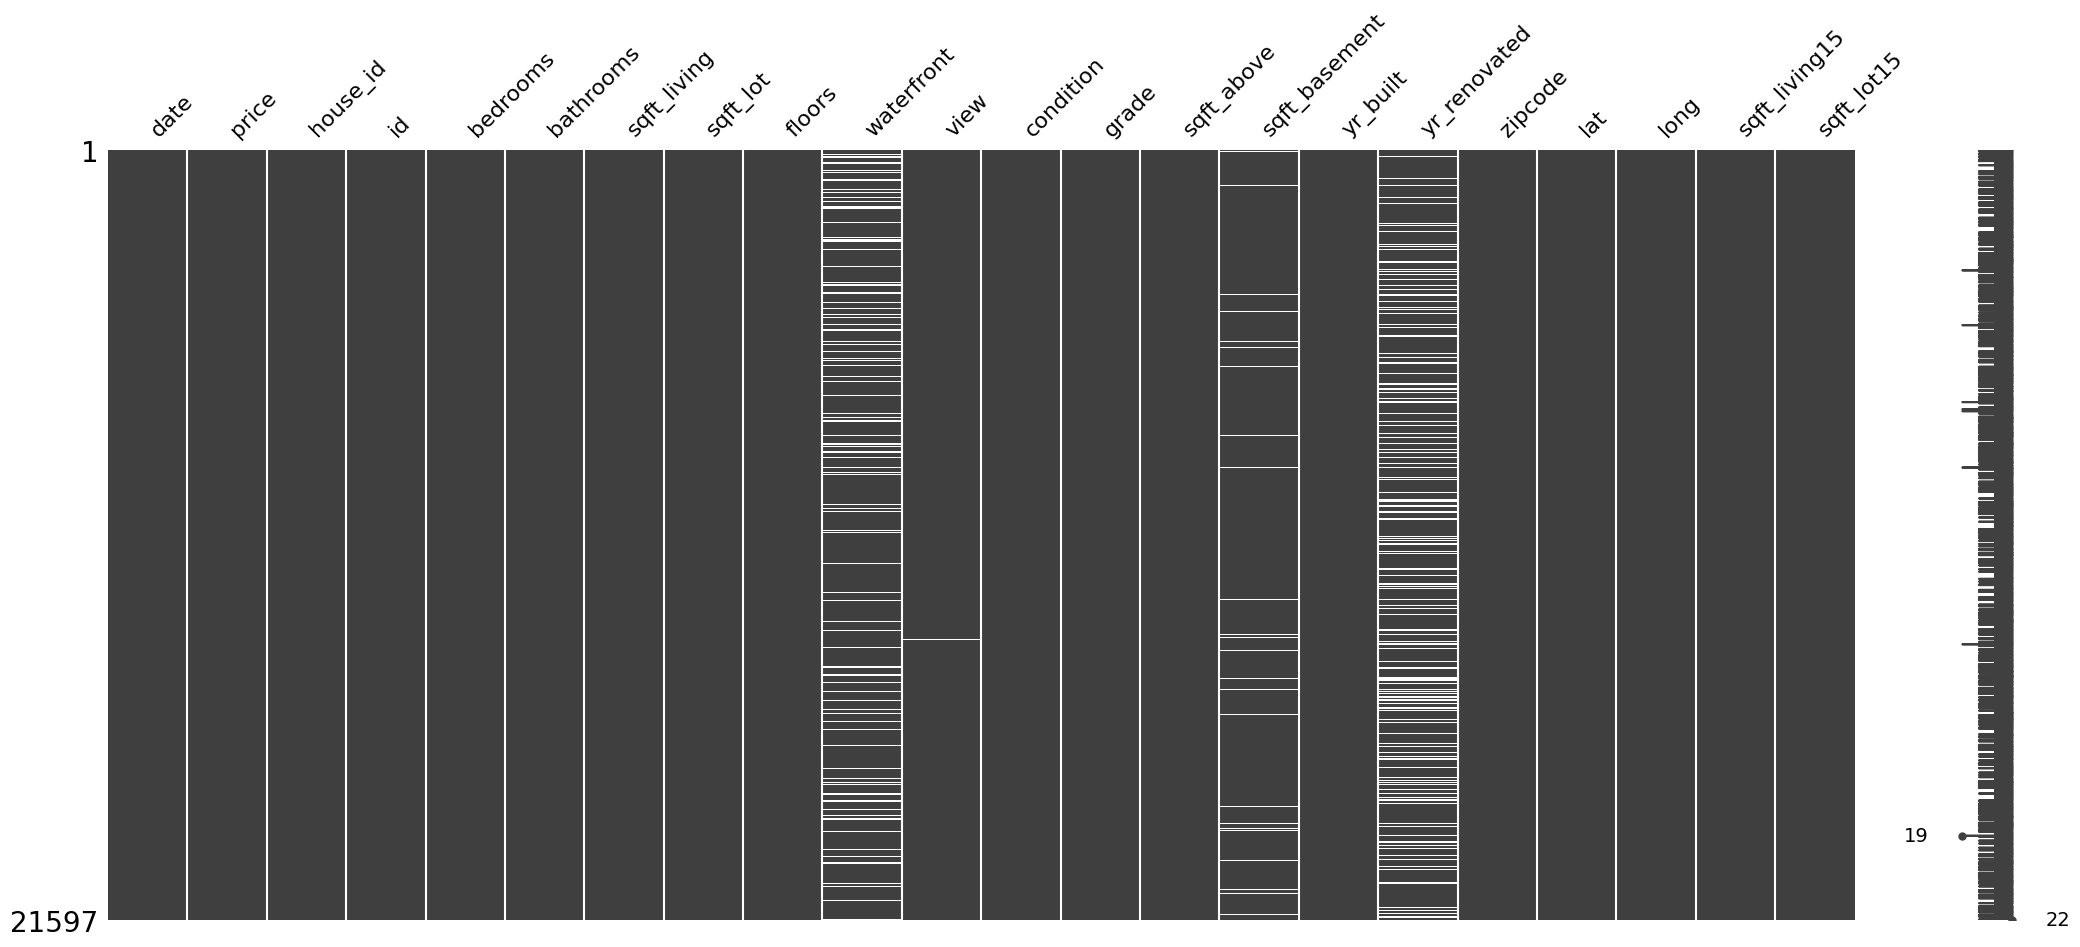

In [9]:
msno.matrix(table)

The specific number of missing values

In [10]:
table.isna().sum()

date                0
price               0
house_id            0
id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Let's with some data cleaning

1. Check any duplicates

In [22]:
if table.duplicated().value_counts()[0] == table.shape[0]:
    print('No Duplicates')
else:
    print('You have duplicate observations!')

No Duplicates


2. Check types of variables and modify for more convienient ones if necessary

In [24]:
table.dtypes

date              object
price            float64
house_id           int64
id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Let's change the date to a datetime type

In [25]:
table['date'] = pd.to_datetime(table['date'], format='%Y-%m-%d')

Let's change the int to float data type in year of renovation and Zipcode to sting

In [27]:
table['yr_built'] = table['yr_built'].astype('float64')
table['zipcode'] = table['zipcode'].astype('str')

Let's have a look on the condition and grade values. 

The grade is a factor is intended to reflect the overall quality of workmanship and materials evident in a dwelling. 

Grade factors are used in the assessment process and are an additional element by which the market value of your dwelling is determined.

In [30]:
print('Condition Values: ', table['condition'].unique())
print('Grade Values: ', table['grade'].unique())

Condition Values:  [3 5 4 1 2]
Grade Values:  [ 7  6  8 11  9  5 10 12  4  3 13]


## Data exploration

1. Where are more available houses?

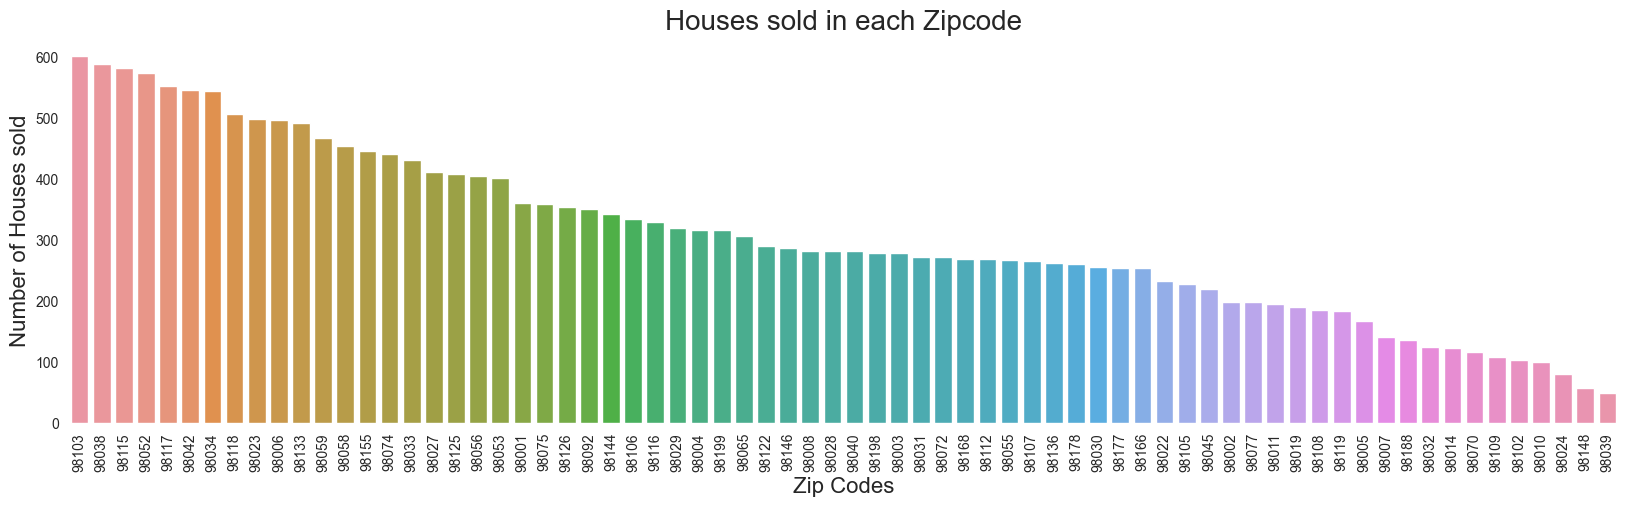

We have in total  70  different zipcodes


In [31]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (20,5))
ZipCode = pd.Categorical(table.zipcode)
sns.countplot(data = table, x = table['zipcode'], order = table['zipcode'].value_counts().index)
plt.xticks(rotation = 90)
plt.xlabel('Zip Codes', fontsize=16)
plt.ylabel('Number of Houses sold', fontsize = 16)
plt.title('Houses sold in each Zipcode', fontsize = 20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()
print('We have in total ', table['zipcode'].nunique(), ' different zipcodes')


**Conclusions**

There is an inhomogeneous distribution of houses sold in different zipcodes.

Let's have a look on the price distribution of the housing market

Price Mean =  540296.5735055795
Price Median =  450000.0
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


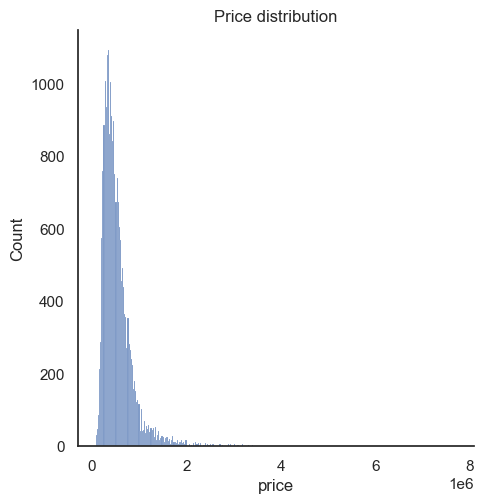

In [31]:
sns.displot(table, x="price", kind="hist")
plt.title('Price distribution')
print('Price Mean = ',table['price'].mean())
print('Price Median = ',table['price'].median())
print(table['price'].describe())

## Let's study the zip code and the quality of the houses around

Zip Code VS Price

In [64]:
# Most expensive (av.) and cheapest neighborhoods
zc_exp = table.groupby('zipcode').price.mean().sort_values(ascending=False)[:10]
zc_ch = table.groupby('zipcode').price.mean().sort_values(ascending=True)[:10]
zc_exp[:3]


zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
Name: price, dtype: float64

Zip Code vs Condition: Avarage and Mode

In [35]:
# Neigborhoods with houses in best/worst condition: AVARAGE
zc_cond_av_g = table.groupby('zipcode').condition.mean().sort_values(ascending=False).round(2)[:10] # good condition
zc_cond_av_b = table.groupby('zipcode').condition.mean().sort_values(ascending=True).round(2)[:10] # bad condition

In [36]:
# What is the most common condition in each zipcode: MODE
# Best Condition
zc_cond_mod_g = table.groupby('zipcode').condition.agg(lambda x: pd.Series.mode(x)[0]).sort_values(ascending = False)[:10]
zc_cond_mod_b = table.groupby('zipcode').condition.agg(lambda x: pd.Series.mode(x)[0]).sort_values(ascending = True)[:10]

Zip Code vs Grade: Avarage and Mode

In [37]:
# What is the av. grade in each zip codes
zc_grade_av_g = table.groupby('zipcode').grade.mean().sort_values(ascending=False)[:10]
zc_grade_av_b = table.groupby('zipcode').grade.mean().sort_values(ascending=True)[:10]
# What is the mode grade in each zip codes
zc_grade_mod_g = table.groupby('zipcode').grade.agg(lambda x: pd.Series.mode(x)[0]).sort_values(ascending = False)[:10]
zc_grade_mod_b = table.groupby('zipcode').grade.agg(lambda x: pd.Series.mode(x)[0]).sort_values(ascending = True)[:10]

## Let's have a look in the date the houses where sold

In [40]:
# In what month do people buy houses more often?
table.groupby(table['date'].dt.month).date.count().sort_values(ascending=False)

date
5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: date, dtype: int64

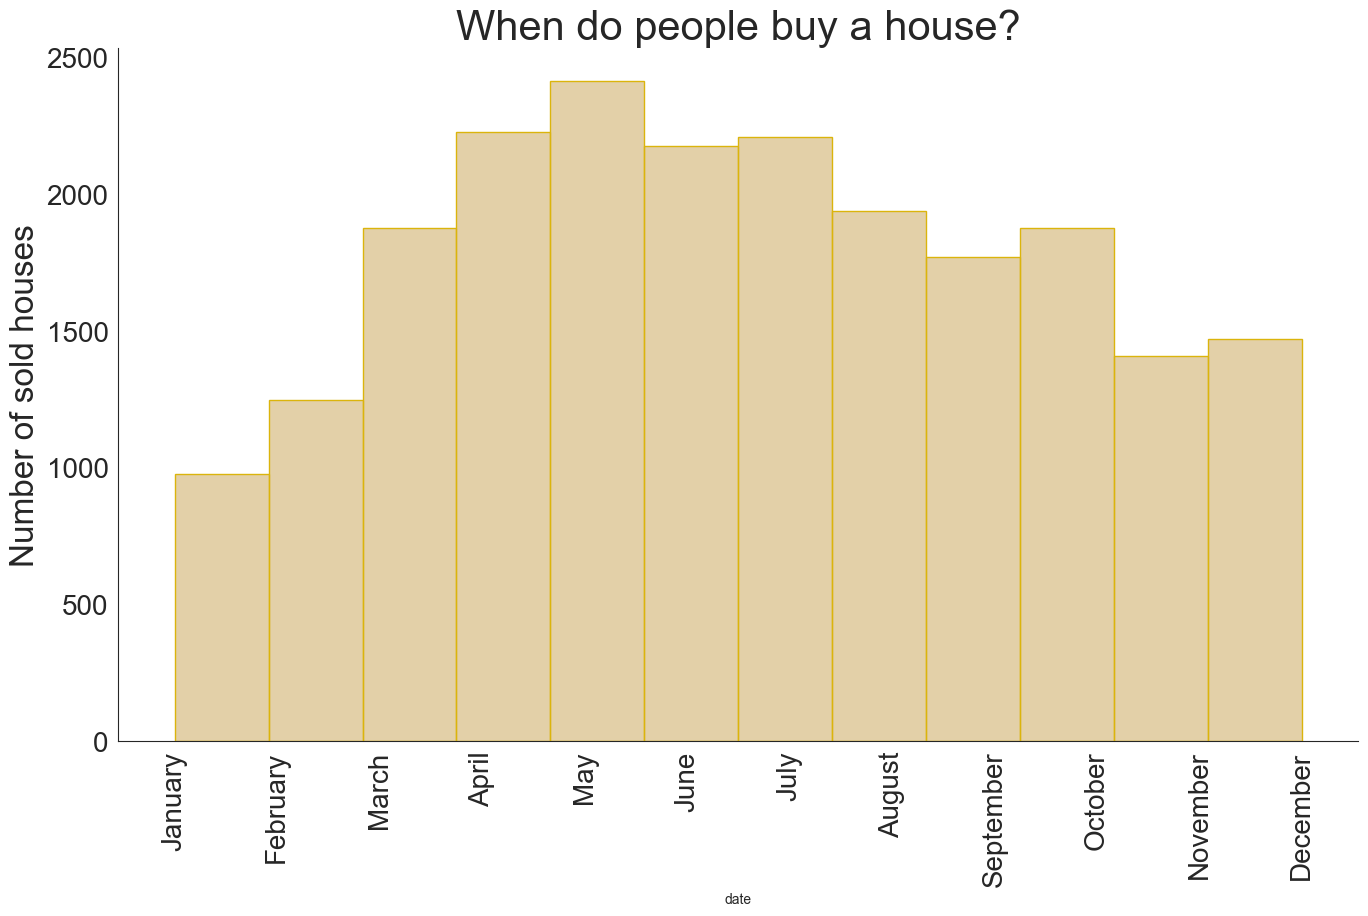

In [41]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (16,9))
sns.histplot(table, x=table['date'].dt.month, alpha = 0.6, bins = 12, color='#D1B26F', edgecolor='#DBB40C')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], 
           ['January', 'February', 'March','April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December'], fontsize=20, rotation = 90)
plt.yticks(fontsize=20)
plt.ylabel('Number of sold houses', fontsize=24)
plt.title('When do people buy a house?', fontsize=30)
plt.show()

**Conclusions**

1. Best sales by volumne in the middle of the year
2. If you want to sell, better to avoid the begining of the year (January and February)

What kind of houses are sold in those months?

In [61]:
# We define 5 price ranges
date_data = table.assign(price_range = pd.qcut(table['price'],5))

Text(17.569756944444435, 0.5, 'Number of houses sold')

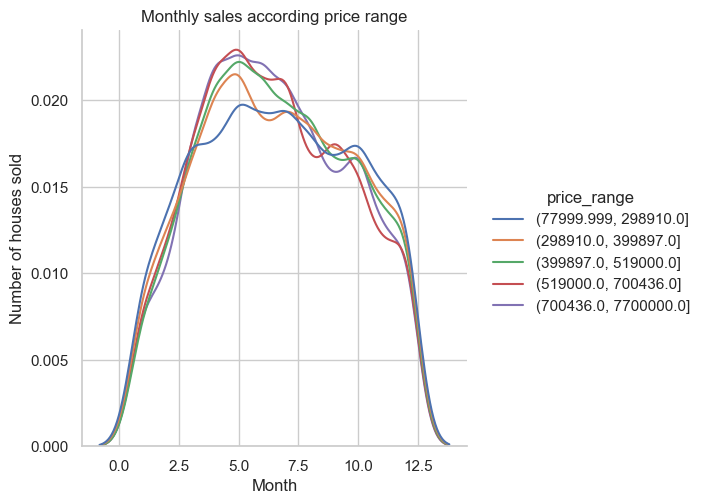

In [62]:
sns.displot(data = date_data, kind = 'kde', x=table['date'].dt.month, hue='price_range')#,order = df['county_residence'].value_counts().index[:10])
plt.title('Monthly sales according price range')
plt.xlabel('Month')
plt.ylabel('Number of houses sold')

Let's have a look of both plots together to understand the buying behaviour

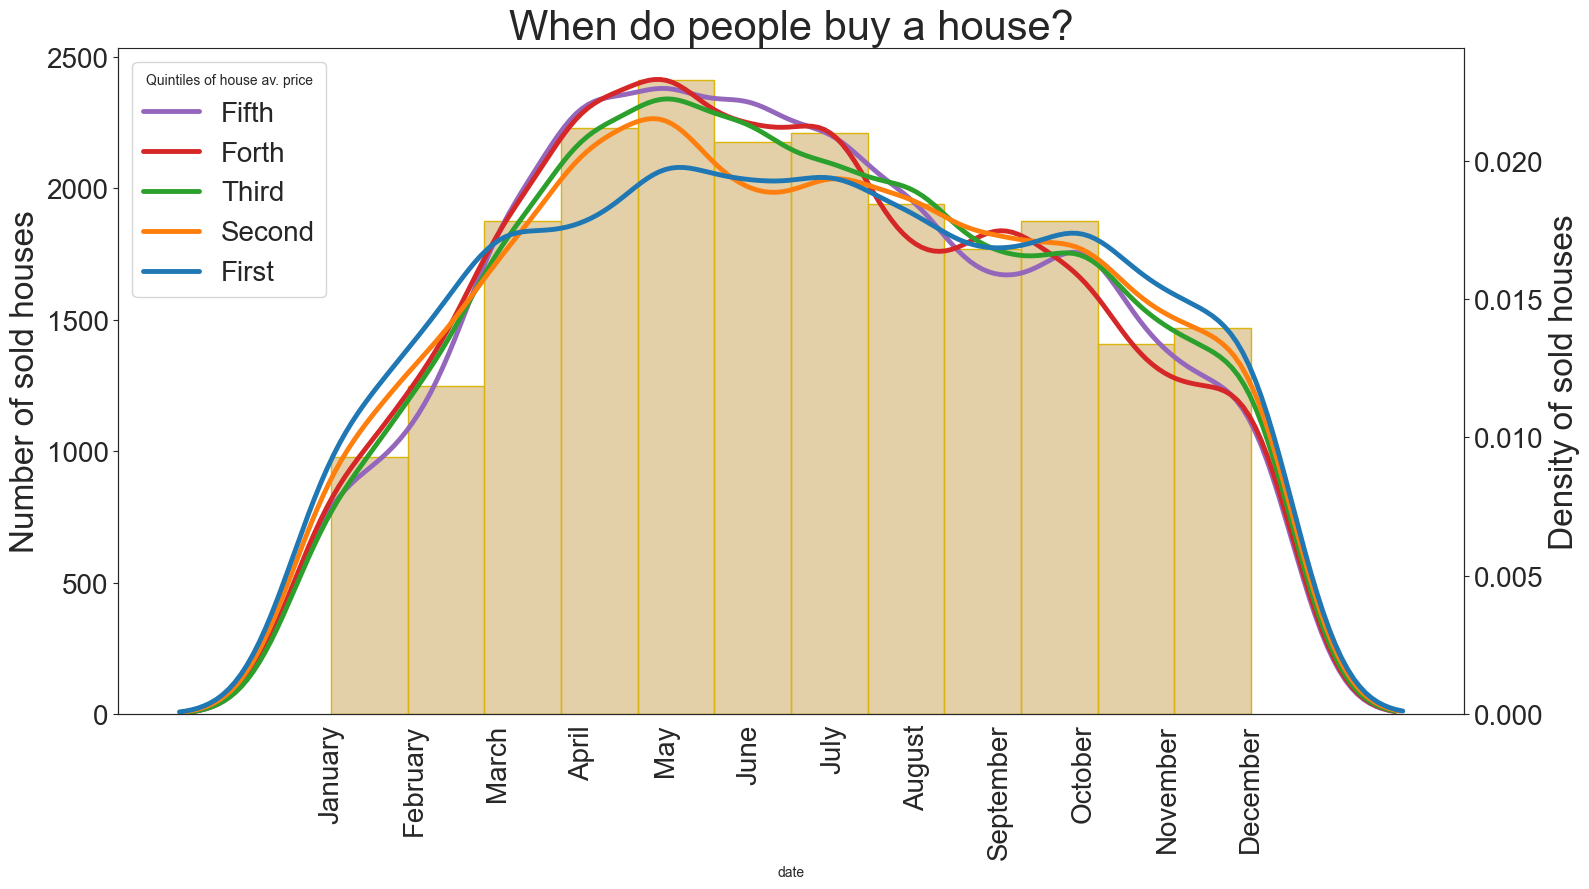

In [44]:
sns.set_style("white")
fig, ax = plt.subplots(figsize = (16,9))
sns.histplot(table, x=table['date'].dt.month, alpha = 0.6, bins = 12, color='#D1B26F', edgecolor='#DBB40C')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], 
           ['January', 'February', 'March','April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December'],fontsize=20, rotation = 90)
plt.ylabel('Number of sold houses', fontsize=24)
plt.yticks(fontsize=20)
font = font_manager.FontProperties(family= 'Times new Roman', 
                                   weight='bold',
                                   style='normal', size=25)
ax2 = ax.twinx()
sns.kdeplot(data = date_data, x=table['date'].dt.month, hue='price_range', ax = ax2, linewidth = 3.5, legend = False)#,order = df['county_residence'].value_counts().index[:10])
ax.spines['top'].set_visible(False)
plt.legend(loc='upper left', labels=['Fifth', 'Forth', 'Third', 'Second', 'First'],title='Quintiles of house av. price', fontsize = 20)#)
plt.title('When do people buy a house?', fontsize=30)
plt.ylabel('Density of sold houses', fontsize=24)
plt.yticks(fontsize=20)

plt.tight_layout()
plt.show()

**Conclusions**

1. All price ranges present similar behaviour.
2. Expensive houses sell better in the middle of the year and less expensive ones at the begin/end of the year

**Selling time depends on the type of the house**

## What about the renovation?

In [46]:
# Missing yearr of renovation
print(f"missing year of renovation : {round(table.yr_renovated.isna().sum()/table.yr_renovated.shape[0]*100,2)} %")

# Let's make a copy of data before nodifying it
table_renovated = date_data.copy()

# We drop the houses that have not been renovated.
table_renovated = table_renovated.drop(table_renovated[table_renovated['yr_renovated']== 0].index)
table_renovated.dropna(subset=['yr_renovated'], inplace = True)


table_renovated.yr_renovated.isnull().sum()
table_renovated.shape


missing year of renovation : 17.82 %


(744, 23)

In [47]:
table_renovated

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
1,2014-12-09,538000.0,6414100192,2,3.0,2.25,2570.0,7242.0,2.0,0.0,...,2170.0,400.0,1951.0,19910.0,98125,47.7210,-122.319,1690.0,7639.0,"(519000.0, 700436.0]"
35,2014-06-13,696000.0,9547205180,36,3.0,2.50,2300.0,3060.0,1.5,0.0,...,1510.0,790.0,1930.0,20020.0,98115,47.6827,-122.310,1590.0,3264.0,"(519000.0, 700436.0]"
95,2014-09-08,905000.0,1483300570,96,4.0,2.50,3300.0,10250.0,1.0,0.0,...,2390.0,910.0,1946.0,19910.0,98040,47.5873,-122.249,1950.0,6045.0,"(700436.0, 7700000.0]"
103,2014-10-07,1090000.0,2450000295,104,3.0,2.50,2920.0,8113.0,2.0,0.0,...,2920.0,0.0,1950.0,20100.0,98004,47.5814,-122.196,2370.0,8113.0,"(700436.0, 7700000.0]"
125,2015-03-02,1450000.0,4389200955,126,4.0,2.75,2750.0,17789.0,1.5,0.0,...,1980.0,770.0,1914.0,19920.0,98004,47.6141,-122.212,3060.0,11275.0,"(700436.0, 7700000.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19602,2014-07-12,451000.0,6392000625,19603,2.0,1.00,900.0,6000.0,1.0,0.0,...,900.0,0.0,1944.0,20040.0,98115,47.6855,-122.289,1460.0,4800.0,"(399897.0, 519000.0]"
20041,2014-09-04,434900.0,126039256,20042,3.0,2.00,1520.0,5040.0,2.0,0.0,...,1520.0,0.0,1977.0,20060.0,98177,47.7770,-122.362,1860.0,8710.0,"(399897.0, 519000.0]"
20428,2015-02-25,500012.0,4305600360,20429,4.0,2.50,2400.0,9612.0,1.0,0.0,...,1230.0,1170.0,1962.0,20090.0,98059,47.4799,-122.127,2430.0,5539.0,"(399897.0, 519000.0]"
20431,2015-02-12,356999.0,3319500628,20432,3.0,1.50,1010.0,1546.0,2.0,NaN,...,1010.0,0.0,1971.0,20140.0,98144,47.5998,-122.311,1010.0,1517.0,"(298910.0, 399897.0]"


We know there are some houses that where sold more than once. Let's see if they were renovates and if so, let's see how much the price increased.

In [49]:
# Given that houses sold more than once have different ID, we will identify them according to their location (lat and long values)
table_resold = table_renovated[table_renovated.duplicated(['lat','long'], keep = False)]
table_resold.groupby('lat').head(10)

,date,price,house_id,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range
324,2014-09-05,232000.0,7520000520,325,2.0,1.00,1240.0,12092.0,1.0,0.0,...,960.0,280.0,1922.0,19840.0,98146,47.4957,-122.352,1820.0,7460.0,"(77999.999, 298910.0]"
325,2015-03-11,240500.0,7520000520,326,2.0,1.00,1240.0,12092.0,1.0,0.0,...,960.0,280.0,1922.0,19840.0,98146,47.4957,-122.352,1820.0,7460.0,"(77999.999, 298910.0]"
330,2014-09-16,880000.0,3179100060,331,4.0,3.50,2800.0,6750.0,2.0,NaN,...,1890.0,910.0,1951.0,20020.0,98105,47.6690,-122.275,2370.0,6120.0,"(700436.0, 7700000.0]"
717,2014-07-28,452000.0,8820903380,718,6.0,2.25,2660.0,13579.0,2.0,0.0,...,2660.0,0.0,1937.0,19900.0,98125,47.7142,-122.286,1120.0,8242.0,"(399897.0, 519000.0]"
718,2015-01-02,730000.0,8820903380,719,6.0,2.25,2660.0,13579.0,2.0,0.0,...,2660.0,0.0,1937.0,19900.0,98125,47.7142,-122.286,1120.0,8242.0,"(700436.0, 7700000.0]"
3946,2014-08-14,550000.0,1825069031,3947,4.0,1.75,2410.0,8447.0,2.0,NaN,...,2060.0,350.0,1936.0,19800.0,98074,47.6499,-122.088,2520.0,14789.0,"(519000.0, 700436.0]"
3947,2014-10-16,550000.0,1825069031,3948,4.0,1.75,2410.0,8447.0,2.0,NaN,...,2060.0,350.0,1936.0,19800.0,98074,47.6499,-122.088,2520.0,14789.0,"(519000.0, 700436.0]"
8426,2014-09-03,225000.0,1721801010,8427,3.0,1.00,1790.0,6120.0,1.0,0.0,...,1790.0,0.0,1937.0,19640.0,98146,47.5080,-122.337,830.0,6120.0,"(77999.999, 298910.0]"
8427,2015-04-24,302100.0,1721801010,8428,3.0,1.00,1790.0,6120.0,1.0,0.0,...,1790.0,0.0,1937.0,19640.0,98146,47.5080,-122.337,830.0,6120.0,"(298910.0, 399897.0]"
11081,2014-12-09,1300000.0,3179100055,11082,5.0,3.50,3700.0,8504.0,2.0,NaN,...,2750.0,950.0,1950.0,20140.0,98105,47.6690,-122.275,2370.0,6246.0,"(700436.0, 7700000.0]"


We see that there were only 5 houses (5 pairs of entries with same lat/long values) that were bought, renovated and resold during 2014-2015.

Let's see the av. prices per zipcode for renovated and not renovated houses

In [176]:
table.groupby('zipcode').value_counts()

zipcode  date        price     house_id    id     bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  lat      long      sqft_living15  sqft_lot15
98001    2014-05-02  285000.0  3328500250  5951   4.0       2.50       2200.0       9397.0    2.0     0.0         0.0   3          8      2200.0      0.0            1987.0    0.0           47.3406  -122.269  2310.0         9176.0        1
         2014-05-05  184000.0  6143600580  7499   3.0       1.75       1490.0       10125.0   1.0     0.0         0.0   4          7      1490.0      0.0            1962.0    0.0           47.3075  -122.284  2488.0         4981.0        1
         2015-04-30  286651.0  6181400920  6839   3.0       2.50       1830.0       4997.0    2.0     0.0         0.0   3          7      1830.0      0.0            2004.0    0.0           47.3035  -122.283  2488.0         4998.0        1
         2014-12-05  115000.0  3356403820  3400  

In [50]:
Serie_r = table_renovated.groupby('zipcode').price.mean().sort_values(ascending=False)[:10]


Let's make a table only with non-renovated houses

In [51]:
table_not_ren = date_data.copy()
table_not_ren = table_not_ren.drop(table_renovated[table_renovated['yr_renovated']!= 0].index)
Serie_nr = table_not_ren.groupby('zipcode').price.mean().sort_values(ascending=False)[:10]

In [52]:
df_inner = pd.merge(Serie_r, Serie_nr, on = 'zipcode', how='inner')
df_inner.head(8)


,price_x,price_y
zipcode,,
98102,2.542500e+06,8.338920e+05
98039,1.895556e+06,2.219634e+06
98004,1.711536e+06,1.322128e+06
98040,1.497084e+06,1.160233e+06
98112,1.104321e+06,1.095555e+06
98105,1.104018e+06,8.475497e+05
98119,9.829594e+05,8.370249e+05


In [53]:
zips = ['98102', '98039', '98004', '98040', '98112', '98105', '98119']

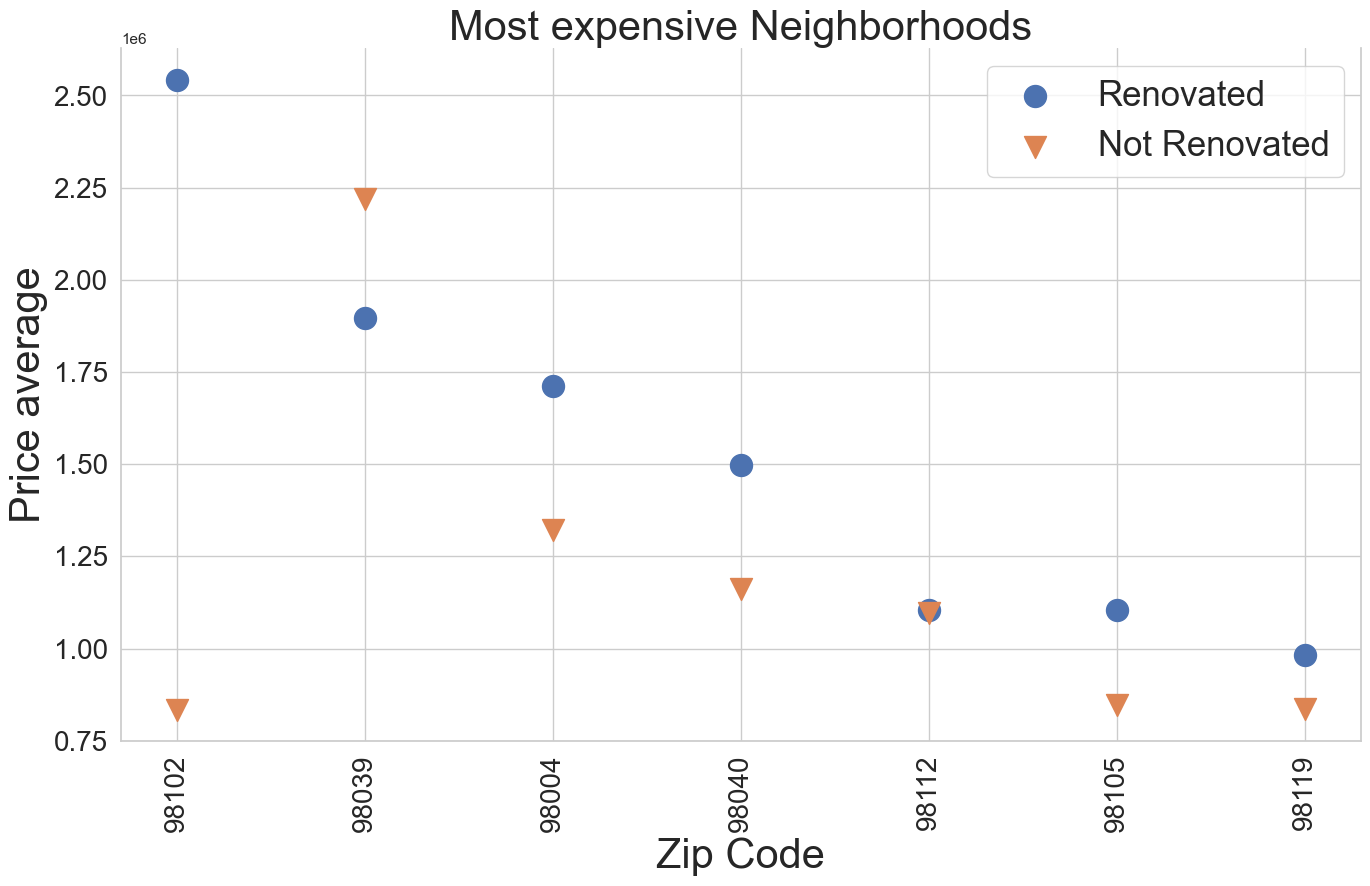

In [54]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize = (16,9))

ax.scatter(
    x= zips,
    y= df_inner.price_x,
    s = 250,
    label = "Renovated"
)

ax.scatter(
    x= zips,
    y= df_inner.price_y,
    label = "Not Renovated",
    s = 250,
    marker = "v"
)

ax.set_xlabel('Zip Code', fontsize=30)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
ax.set_ylabel('Price average', fontsize=30)
ax.set_title('Most expensive Neighborhoods', fontsize=30)
ax.spines['top'].set_visible(False)
# add legend
plt.legend(fontsize = 25)

#ax.legend()
plt.show()


**Conclusions**
1. In expensive neighborhoods, renovates houses reach better prices.
2. We have two singluar Zipcodes: 98039 and 98112


Explanation:
1. Zipcode 98039 has the lowest sales volume (see 'Houses sold in each Zipcode' plot above), the highest av. price and highest av. grade. It might mean that those houses are old traditional houses in good conditions, where the antique style is desired above a modern style.
2. Zip code 98112: Top 5 highes av. price and top 5 highest av. grade. Here we also have probably good houses in very good condition, where the original design is more valuable that the renovation.

In [55]:
Serie_r2 = table_renovated.groupby('zipcode').price.mean().sort_values(ascending=True)[:10]
table_not_ren2 = date_data.copy()
table_not_ren2 = table_not_ren2.drop(table_renovated[table_renovated['yr_renovated']!= 0].index)
Serie_nr2 = table_not_ren2.groupby('zipcode').price.mean().sort_values(ascending=True)[:10]
df_inner2 = pd.merge(Serie_r2, Serie_nr2, on = 'zipcode', how='inner')
df_inner2.head(8)

,price_x,price_y
zipcode,,
98148,195000.000000,286514.107143
98002,233230.000000,234311.201031
98001,245250.000000,281597.613445
98168,251116.666667,240082.250951
98032,252000.000000,251284.796748
98188,262280.000000,289682.819549


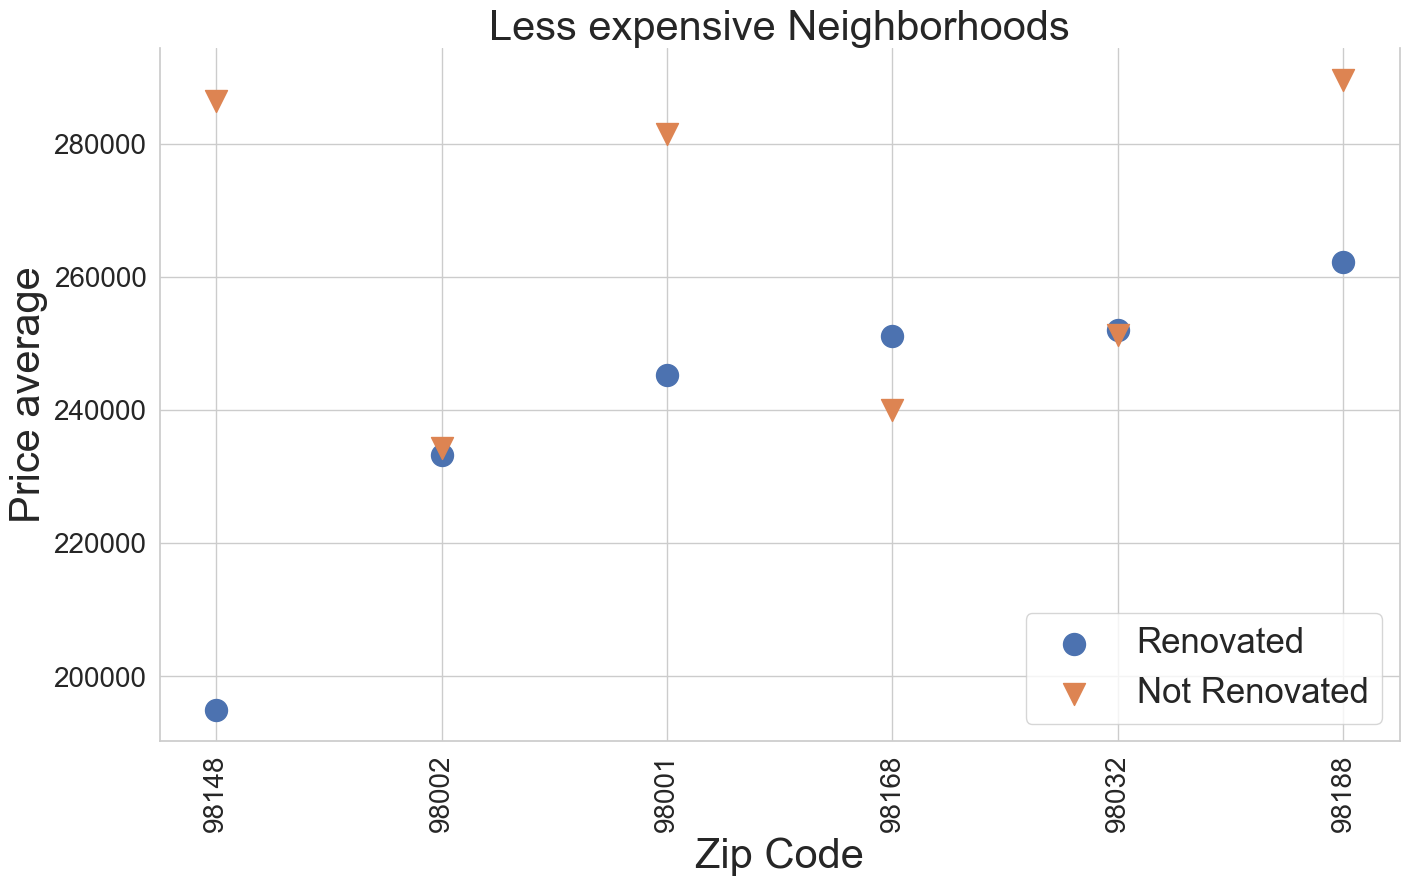

In [56]:
sns.set_theme(style="whitegrid")
zips2 = ['98148', '98002','98001', '98168', '98032', '98188']
fig, ax = plt.subplots(figsize = (16,9))

ax.scatter(
    x= zips2,
    y= df_inner2.price_x,
    label = "Renovated", 
    s = 250  
)

ax.scatter(
    x= zips2,
    y= df_inner2.price_y,
    label = "Not Renovated",
    s = 250,
    marker = "v"
)

ax.set_xlabel('Zip Code', fontsize=30)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
ax.set_ylabel('Price average', fontsize=30)
ax.set_title('Less expensive Neighborhoods', fontsize=30)
ax.spines['top'].set_visible(False)
# add legend
plt.legend(fontsize = 25)

plt.show()

**Conlisions**

1. In less expensive neighbourhoods there is a divided behaviour: Other factors play a role.
2. Not renovated houses seem to reach higher prices. Hypothesis: Renovation to solve issues instead of optional
